# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


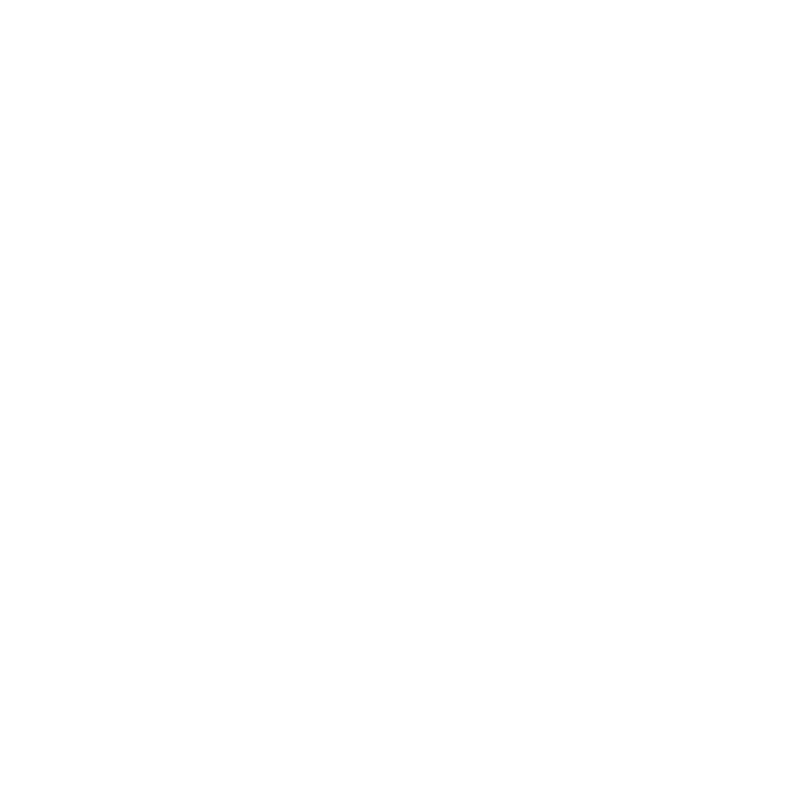

In [221]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import re

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [222]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [223]:
df.shape

(165085, 4)

In [224]:
df.set_index(df['Date'],inplace=True)  # change the index into Date
df.head()

,ID,Date,Element,Data_Value
Date,,,,
2014-11-12,USW00094889,2014-11-12,TMAX,22
2009-04-29,USC00208972,2009-04-29,TMIN,56
2008-05-26,USC00200032,2008-05-26,TMAX,278
2005-11-11,USC00205563,2005-11-11,TMAX,139
2014-02-27,USC00200230,2014-02-27,TMAX,-106


In [225]:
df.drop(['2008-02-29','2012-02-29'],inplace=True) #drop leap days
df.head()

,ID,Date,Element,Data_Value
Date,,,,
2014-11-12,USW00094889,2014-11-12,TMAX,22
2009-04-29,USC00208972,2009-04-29,TMIN,56
2008-05-26,USC00200032,2008-05-26,TMAX,278
2005-11-11,USC00205563,2005-11-11,TMAX,139
2014-02-27,USC00200230,2014-02-27,TMAX,-106


In [226]:
df=df[['Element','Data_Value']]
df.head()

,Element,Data_Value
Date,,
2014-11-12,TMAX,22
2009-04-29,TMIN,56
2008-05-26,TMAX,278
2005-11-11,TMAX,139
2014-02-27,TMAX,-106


In [227]:
df1=df[df.index <'2015-01-01'] # days before 2015
df1.head()

,Element,Data_Value
Date,,
2014-11-12,TMAX,22
2009-04-29,TMIN,56
2008-05-26,TMAX,278
2005-11-11,TMAX,139
2014-02-27,TMAX,-106


In [228]:
df2 = df[df.index >='2015-01-01'] #days after 2014-12-31
df2.shape

(13757, 2)

In [229]:
reindex=[]
for i in df1.index:
    reindex.append(re.findall('20[0-9][0-9]-(.+)',i)[0])
reindex[:5]

['11-12', '04-29', '05-26', '11-11', '02-27']

In [230]:
df1['Date']=reindex
df1.set_index('Date',inplace=True)
df1.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Element,Data_Value
Date,,
11-12,TMAX,22
04-29,TMIN,56
05-26,TMAX,278
11-11,TMAX,139
02-27,TMAX,-106


In [231]:
reindex2=[]
for i in df2.index:
    reindex2.append(re.findall('20[0-9][0-9]-(.+)',i)[0])
reindex2[:5]

['01-03', '03-17', '06-06', '08-30', '08-30']

In [232]:
df2['Date']=reindex2
df2.set_index('Date',inplace=True)
df2.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Element,Data_Value
Date,,
01-03,TMIN,-39
03-17,TMAX,189
06-06,TMIN,128
08-30,TMIN,178
08-30,TMIN,156


In [233]:
df1_min=df1[df1['Element'] == 'TMIN']
df1_min=df1_min.groupby(df1_min.index)['Data_Value'].min()
df1_min.head()

Date
01-01   -160
01-02   -267
01-03   -267
01-04   -261
01-05   -150
Name: Data_Value, dtype: int64

In [234]:
df1_max=df1[df1['Element'] == 'TMAX']
df1_max=df1_max.groupby(df1_max.index)['Data_Value'].max()
df1_max.head()

Date
01-01    156
01-02    139
01-03    133
01-04    106
01-05    128
Name: Data_Value, dtype: int64

In [235]:
day=list(df1.index.unique())
day.sort()
pd.to_datetime(day[0],format='%m-%d')

Timestamp('1900-01-01 00:00:00')

<IPython.core.display.Javascript object>


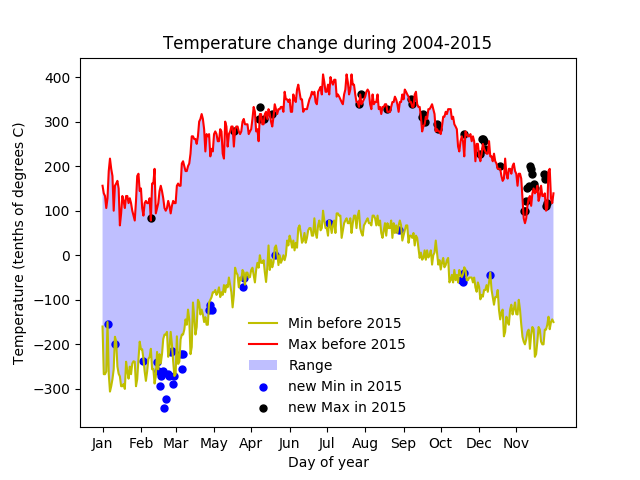

In [236]:
%matplotlib notebook
plt.figure()
plt.plot(range(1,366),df1_min,'-y')
plt.plot(range(1,366),df1_max,'-r')

In [237]:
plt.xticks([1,32,60,91,121,152,182,213,244,274,305,335],['Jan','Feb','Mar','May','Apr','Jun','Jul','Aug','Sep','Oct','Dec','Nov'])

([<matplotlib.axis.XTick at 0x7f6fabc75b00>,
 <a list of 12 Text xticklabel objects>)

In [238]:
plt.gca().fill_between(range(1,366), 
                       df1_min, df1_max, 
                       facecolor='blue', 
                       alpha=0.25)

In [239]:
plt.xlabel('Day of year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('Temperature change during 2004-2015')

In [240]:
df1_min.index

Index(['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08',
       '01-09', '01-10',
       ...
       '12-22', '12-23', '12-24', '12-25', '12-26', '12-27', '12-28', '12-29',
       '12-30', '12-31'],
      dtype='object', name='Date', length=365)

In [241]:
df2.sort_index(inplace=True)
df2.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Element,Data_Value
Date,,
01-01,TMIN,-106
01-01,TMIN,-106
01-01,TMIN,-111
01-01,TMAX,0
01-01,TMIN,-94


In [242]:
df2_max=df2[df2['Element']=='TMAX'] 
df2_min=df2[df2['Element']=='TMIN'] 
df2_max.head()

,Element,Data_Value
Date,,
01-01,TMAX,0
01-01,TMAX,-6
01-01,TMAX,-11
01-01,TMAX,-50
01-01,TMAX,-5


In [243]:
df2_max=df2_max.groupby(df2_max.index)['Data_Value'].max()
df2_min=df2_min.groupby(df2_min.index)['Data_Value'].min()
df2_max.head()

Date
01-01    11
01-02    39
01-03    39
01-04    44
01-05    28
Name: Data_Value, dtype: int64

In [244]:
m=pd.DataFrame({'before 2015':df1_max,'2015':df2_max})
m['index']=range(1,366)
m.set_index(m['index'],inplace=True)
m=m[m['2015']>m['before 2015']]['2015']
len(m)

37

In [245]:
n=pd.DataFrame({'before 2015':df1_min,'2015':df2_min})
n['index']=range(1,366)
n.set_index(n['index'],inplace=True)
n=n[n['2015']<n['before 2015']]['2015']
len(n)

32

In [246]:
plt.scatter(n.index,n,c='blue',s=25)

In [247]:
plt.scatter(m.index,m,c='black',s=25)

In [248]:
plt.legend(['Min before 2015' ,'Max before 2015','Range', 'new Min in 2015','new Max in 2015'],frameon=False)